<a href="https://colab.research.google.com/github/atieh-a/ML.homework/blob/main/hw12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
vehicle = pd.read_csv("C:/Users/arab/Downloads/vehicle.csv")
vehicle.head()

,Compactness,Circularity,Distance.Circularity,Radius.Ratio,Pr.Axis.Aspect.Ratio,Max.Length.Aspect.Ratio,Scatter.Ratio,Elongatedness,Pr.Axis.Rectangularity,Max.Length.Rectangularity,Scaled.Variance.Along.Major.Axis,Scaled.Variance.Along.Minor.Axis,Scaled.Radius.of.Gyration,Skewness.About.Major.Axis,Skewness.About.Minor.Axis,Kurtosis.About.Minor.Axis,Kurtosis.About.Major.Axis,Hollows.Ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,4
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,4
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,4
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,3


In [ ]:
set1 = vehicle.iloc[:3*int(len(vehicle)/4)+1, :]
set2= vehicle.iloc[3*int(len(vehicle)/4)+1:, :]

In [ ]:
X_train=set1.drop(['class'],axis=1)
y_train=set1['class']
X_test=set2.drop(['class'],axis=1)
y_test=set2['class']

In [ ]:
X=vehicle.drop(['class'],axis=1)
y=vehicle['class']
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
X_norm = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)
print(X_norm)

     Compactness  Circularity  Distance.Circularity  Radius.Ratio  \
0       0.478261     0.576923              0.597222      0.323144   
1       0.391304     0.307692              0.611111      0.161572   
2       0.673913     0.653846              0.916667      0.458515   
3       0.434783     0.307692              0.583333      0.240175   
4       0.260870     0.423077              0.416667      0.441048   
..           ...          ...                   ...           ...   
841     0.434783     0.230769              0.652778      0.344978   
842     0.347826     0.500000              0.611111      0.257642   
843     0.717391     0.807692              0.847222      0.515284   
844     0.282609     0.115385              0.527778      0.183406   
845     0.260870     0.115385              0.361111      0.082969   

     Pr.Axis.Aspect.Ratio  Max.Length.Aspect.Ratio  Scatter.Ratio  \
0                0.274725                 0.150943       0.326797   
1                0.109890        

In [ ]:
# create model
model = linear_model.LogisticRegression(penalty='none')
# evaluate model
scores = cross_val_score(model, X_norm, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.796 (0.050)


In [ ]:
s = cross_val_score(model, X_norm, y, cv=cv, scoring='neg_mean_squared_error')
print(s.mean())

c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

-0.3673389355742297


c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [ ]:
model1 = linear_model.LogisticRegression(penalty='none').fit(X_norm,y)

c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred=model1.predict(X_norm)
print('Confusion matrix with counts: ')
print(confusion_matrix(y, y_pred))
print('Confusion matrix with proportions: ')
print(confusion_matrix(y, y_pred, normalize='true'))

Confusion matrix with counts: 
[[139  66   5   2]
 [ 62 148   4   3]
 [  6   6 205   1]
 [  3   0   1 195]]
Confusion matrix with proportions: 
[[0.65566038 0.31132075 0.02358491 0.00943396]
 [0.28571429 0.68202765 0.01843318 0.01382488]
 [0.02752294 0.02752294 0.94036697 0.00458716]
 [0.01507538 0.         0.00502513 0.9798995 ]]


In [ ]:
MultiModelCV = linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5, random_state=0,scoring='neg_mean_squared_error', max_iter=1000).fit(X, y)
print('Best regularization parameter: ', MultiModelCV.C_)
print('Model accuracy: ', MultiModelCV.score(X, y))
y_pred = MultiModelCV.predict(X)
print('Confusion matrix with counts: ')
print(confusion_matrix(y, y_pred))
print('Confusion matrix with proportions: ')
print(confusion_matrix(y, y_pred, normalize='true'))

Best regularization parameter:  [ 0.35938137 21.5443469   0.35938137  0.35938137]
Model accuracy:  0.8132387706855791
Confusion matrix with counts: 
[[130  74   3   5]
 [ 52 151  11   3]
 [  3   2 212   1]
 [  1   1   2 195]]
Confusion matrix with proportions: 
[[0.61320755 0.3490566  0.01415094 0.02358491]
 [0.23963134 0.69585253 0.05069124 0.01382488]
 [0.01376147 0.00917431 0.97247706 0.00458716]
 [0.00502513 0.00502513 0.01005025 0.9798995 ]]


In [ ]:
model_lasso = linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5, random_state=0, max_iter=1000)
sc = cross_val_score(model_lasso, X, y,scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print(sc.mean())

-0.32371148459383753


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, ClassifierMixin

In [ ]:
LDA_mod = LinearDiscriminantAnalysis()
# evaluate model
LDA_scores = cross_val_score(LDA_mod, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy for LDA: %.3f (%.3f)' % (np.mean(LDA_scores), np.std(LDA_scores)))

Mean Accuracy for LDA: 0.789 (0.044)


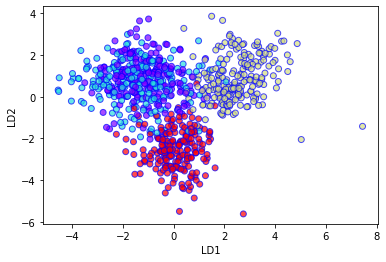

In [ ]:
X_lda = LDA_mod.fit_transform(X, y)
plt.xlabel('LD1')
plt.ylabel('LD2')
le = LabelEncoder()
y_lab = le.fit_transform(vehicle['class'])
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_lab,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b')

In [ ]:
#QDA model

QDA_mod = QuadraticDiscriminantAnalysis()

QDA_scores = cross_val_score(QDA_mod, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy for QDA: %.3f (%.3f)' % (np.mean(QDA_scores), np.std(QDA_scores)))

Mean Accuracy for QDA: 0.848 (0.038)


In [ ]:
qda_s=cross_val_score(QDA_mod, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print(qda_s.mean())

-0.2917086834733893


Part 2

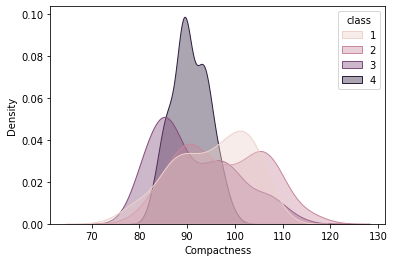

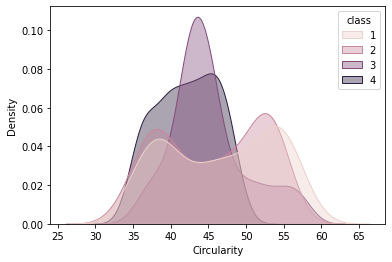

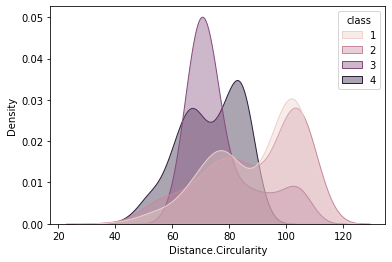

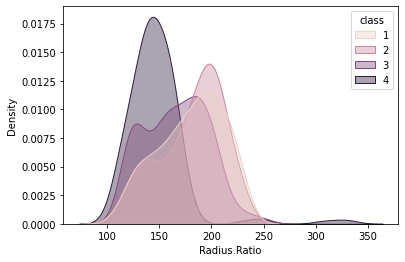

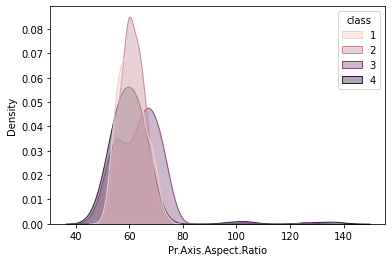

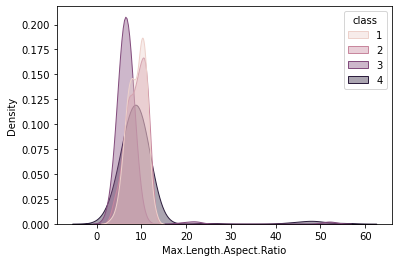

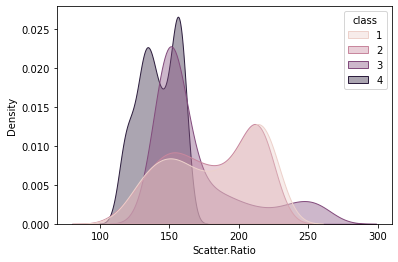

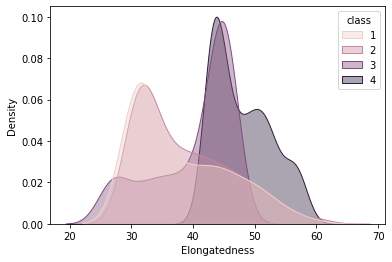

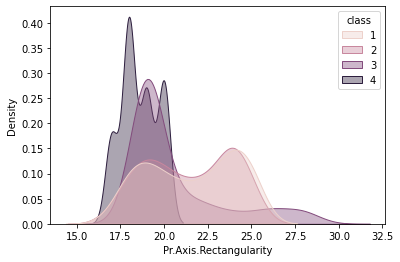

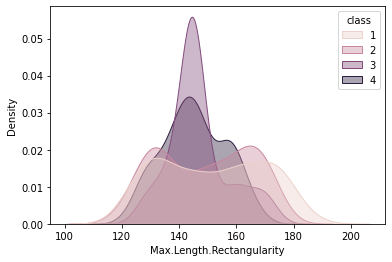

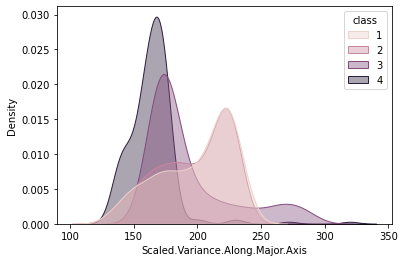

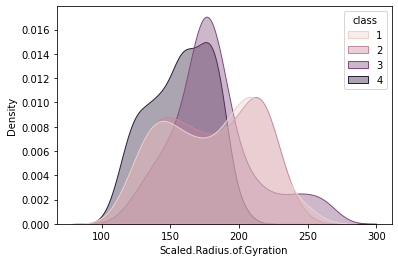

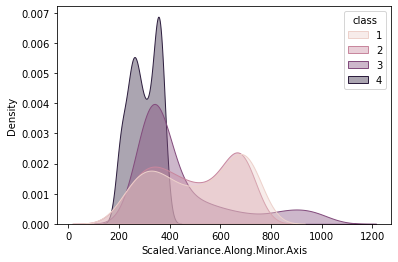

In [ ]:
sns.kdeplot(data=vehicle, x="Compactness", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Circularity", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Distance.Circularity", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Radius.Ratio", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Pr.Axis.Aspect.Ratio", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Max.Length.Aspect.Ratio", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Scatter.Ratio", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Elongatedness", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Pr.Axis.Rectangularity", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Max.Length.Rectangularity", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Scaled.Variance.Along.Major.Axis", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Scaled.Radius.of.Gyration", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Scaled.Variance.Along.Minor.Axis", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()


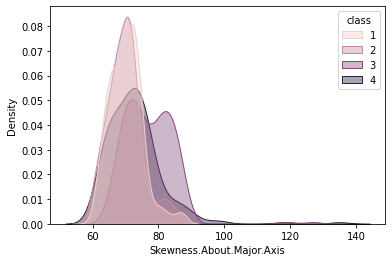

ValueError: Could not interpret value ` Kurtosis.About.Minor.Axis` for parameter `x`

In [ ]:
sns.kdeplot(data=vehicle, x="Skewness.About.Major.Axis", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()

sns.kdeplot(data=vehicle, x=" Kurtosis.About.Minor.Axis", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Kurtosis.About.Major.Axis", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()
sns.kdeplot(data=vehicle, x="Hollows.Ratio", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB_mod = GaussianNB()

NB_scores = cross_val_score(NB_mod, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
#for test
print('MSPE =',(-NB_scores.mean()))

MSPE = 1.5557843137254903


In [ ]:
NB_mod = GaussianNB()

NB_scores = cross_val_score(NB_mod, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
#for train
print('sMSE =', -NB_scores.mean())

sMSE = 1.6611855158730158


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
# PCA
std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

pca = PCA()
PCs_train = pd.DataFrame(pca.fit_transform(X_train_std))
PCs_test = pd.DataFrame(pca.transform(X_test_std))

# define model
NB_pc_mod = GaussianNB().fit(PCs_train, y_train)
NB_pc_pred = NB_pc_mod.predict(PCs_test)

NB_pc_y_train=NB_pc_mod.predict(PCs_train)
# summarize result
print('MSPE =',mean_squared_error(y_test, NB_pc_pred))
print('sMSE =',mean_squared_error(y_train, NB_pc_y_train))

MSPE = 0.44339622641509435
sMSE = 0.48580441640378547


In [ ]:
class KDE_NB(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

#class KDE_NB(BaseEstimator, ClassifierMixin):
#    """Bayesian generative classification based on KDE
#    
#    Parameters
#    ----------
#    bandwidth : float
#        the kernel bandwidth within each class
#    kernel : str
#        the kernel name, passed to KernelDensity
#    """

def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel

def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self

def predict_proba(self, X):
        logprobs = np.vstack([model.score_samples(X)
                              for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)

def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDE_NB(), {'bandwidth': bandwidths})
grid.fit(X, y)

print(grid.best_params_)
print('MSPE =',1-grid.cv_results_['mean_test_score'])


C:\Users\arab\AppData\Local\Temp/ipykernel_6924/1087378001.py:29: RuntimeWarning: invalid value encountered in true_divide
  return result / result.sum(1, keepdims=True)
C:\Users\arab\AppData\Local\Temp/ipykernel_6924/1087378001.py:29: RuntimeWarning: invalid value encountered in true_divide
  return result / result.sum(1, keepdims=True)
C:\Users\arab\AppData\Local\Temp/ipykernel_6924/1087378001.py:29: RuntimeWarning: invalid value encountered in true_divide
  return result / result.sum(1, keepdims=True)
C:\Users\arab\AppData\Local\Temp/ipykernel_6924/1087378001.py:29: RuntimeWarning: invalid value encountered in true_divide
  return result / result.sum(1, keepdims=True)
C:\Users\arab\AppData\Local\Temp/ipykernel_6924/1087378001.py:29: RuntimeWarning: invalid value encountered in true_divide
  return result / result.sum(1, keepdims=True)
C:\Users\arab\AppData\Local\Temp/ipykernel_6924/1087378001.py:29: RuntimeWarning: invalid value encountered in true_divide
  return result / result.su

{'bandwidth': 8.111308307896872}
MSPE = [0.38295162 0.39356074 0.38765054 0.3935677  0.38528368 0.38291681
 0.39710407 0.39239123 0.39945005 0.39238427 0.38174034 0.37701357
 0.37345632 0.36872259 0.37701357 0.36280543 0.37111034 0.36401671
 0.37938044 0.35572572 0.36283328 0.3592969  0.35573964 0.36047337
 0.35810651 0.35928994 0.35692308 0.35810651 0.35692308 0.35455621
 0.35573964 0.35337974 0.35456317 0.35573964 0.35573964 0.35455621
 0.35337278 0.35337278 0.35099896 0.35099896 0.34863209 0.34862513
 0.34862513 0.34861817 0.34624434 0.34387748 0.34625131 0.34862513
 0.34862513 0.34981552 0.35100592 0.34982945 0.34746954 0.36162896
 0.36281239 0.36517229 0.36398886 0.36281935 0.37226592 0.37108249
 0.3698921  0.3746119  0.37933171 0.38994779 0.39704142 0.39585799
 0.40058475 0.40176123 0.40412809 0.40886182 0.40885486 0.41358858
 0.41358162 0.41830839 0.42539506 0.42893143 0.43602506 0.4419283
 0.44666203 0.44900801 0.45728507 0.46555517 0.47975635 0.48095371
 0.48095371 0.48332057 